# NAME-PAPU SWAIN

PROJECT-Customer Service Requests Analysis

DOMAIN-Customer Service

OBJECTIVE-NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.

In [ ]:
import pandas as pd
import numpy as np

In [58]:
nyc=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [59]:
nyc.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"


In [60]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [61]:
nyc.drop(nyc.iloc[:,39:50], inplace = True, axis = 1)

In [62]:
nyc=nyc.drop(columns=['Landmark','Intersection Street 1','Intersection Street 2','Incident Zip','Street Name','Incident Address','Cross Street 1','Cross Street 2'])

In [63]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Address Type                    297883 non-null  object 
 9   City                            298084 non-null  object 
 10  Facility Type                   298527 non-null  object 
 11  Status                          300698 non-null  object 
 12  Due Date        

In [64]:
nyc.isna().sum()

Unique Key                           0
Created Date                         0
Closed Date                       2164
Agency                               0
Agency Name                          0
Complaint Type                       0
Descriptor                        5914
Location Type                      131
Address Type                      2815
City                              2614
Facility Type                     2171
Status                               0
Due Date                             3
Resolution Description               0
Resolution Action Updated Date    2187
Community Board                      0
Borough                              0
X Coordinate (State Plane)        3540
Y Coordinate (State Plane)        3540
Park Facility Name                   0
Park Borough                         0
School Name                          0
School Number                        0
School Region                        1
School Code                          1
School Phone Number      

In [65]:
nyc.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Address Type                       object
City                               object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                    object
Borough                            object
X Coordinate (State Plane)        float64
Y Coordinate (State Plane)        float64
Park Facility Name                 object
Park Borough                       object
School Name                        object
School Number                      object
School Region                     

 Convert the columns ‘Created Date’ and Closed Date’ to datetime datatype

In [66]:
nyc['Created Date']=pd.to_datetime(nyc['Created Date'])
nyc['Closed Date']=pd.to_datetime(nyc['Closed Date'])

In [67]:
nyc.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Address Type,City,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,ADDRESS,NEW YORK,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,ADDRESS,ASTORIA,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"


In [68]:
nyc=nyc[pd.notna(nyc['Closed Date'])]

In [69]:
nyc[['Closed Date','Created Date']].isna().sum()

Closed Date     0
Created Date    0
dtype: int64

New column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing

In [70]:
nyc['Request_Closing_Time']=nyc['Closed Date']-nyc['Created Date']

In [71]:
nyc['Request_Closing_Time'].head()

0   0 days 00:55:15
1   0 days 01:26:16
2   0 days 04:51:31
3   0 days 07:45:14
4   0 days 03:27:02
Name: Request_Closing_Time, dtype: timedelta64[ns]

In [72]:
nyc['Request_Closing_Time']=nyc['Request_Closing_Time']/np.timedelta64(1,'s')

In [73]:
nyc['Request_Closing_Time'].head()

0     3315.0
1     5176.0
2    17491.0
3    27914.0
4    12422.0
Name: Request_Closing_Time, dtype: float64

In [74]:
nyc.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Address Type,City,...,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,ADDRESS,NEW YORK,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",3315.0
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,ADDRESS,ASTORIA,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",5176.0
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,ADDRESS,BRONX,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",17491.0
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,ADDRESS,BRONX,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",27914.0
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,ADDRESS,ELMHURST,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",12422.0


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
nyc.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Address Type', 'City',
       'Facility Type', 'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'Latitude', 'Longitude', 'Location', 'Request_Closing_Time'],
      dtype='object')

In [78]:
nyc1=nyc.groupby(["City","Complaint Type"]).size().unstack().fillna(0)
nyc1

Complaint Type,Animal Abuse,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Parking,Noise - Commercial,Noise - House of Worship,...,Noise - Vehicle,Panhandling,Urinating in Public,Vending,Bike/Roller/Skate Chronic,Illegal Fireworks,Posting Advertisement,Traffic,Squeegee,Animal in a Park
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,38.0,35.0,27.0,2.0,1.0,1.0,4.0,58.0,2.0,11.0,...,7.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ASTORIA,125.0,2618.0,351.0,3.0,35.0,4.0,32.0,1068.0,1293.0,19.0,...,204.0,1.0,9.0,54.0,15.0,4.0,1.0,47.0,0.0,0.0
Astoria,0.0,116.0,12.0,0.0,0.0,0.0,0.0,213.0,261.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BAYSIDE,37.0,377.0,198.0,1.0,1.0,3.0,2.0,514.0,40.0,2.0,...,16.0,0.0,0.0,2.0,0.0,0.0,0.0,9.0,0.0,0.0
BELLEROSE,7.0,95.0,89.0,2.0,1.0,0.0,1.0,106.0,37.0,1.0,...,10.0,1.0,1.0,0.0,1.0,1.0,1.0,7.0,0.0,0.0
BREEZY POINT,2.0,3.0,3.0,0.0,1.0,0.0,0.0,15.0,4.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BRONX,1415.0,12754.0,1952.0,63.0,188.0,9.0,247.0,7859.0,2433.0,79.0,...,3396.0,19.0,51.0,379.0,20.0,24.0,17.0,355.0,0.0,0.0
BROOKLYN,2394.0,28147.0,5179.0,72.0,257.0,43.0,857.0,27461.0,11458.0,340.0,...,5176.0,49.0,136.0,515.0,111.0,61.0,45.0,1085.0,0.0,0.0
CAMBRIA HEIGHTS,11.0,147.0,115.0,0.0,0.0,0.0,5.0,76.0,12.0,2.0,...,77.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,0.0


<AxesSubplot:ylabel='City'>

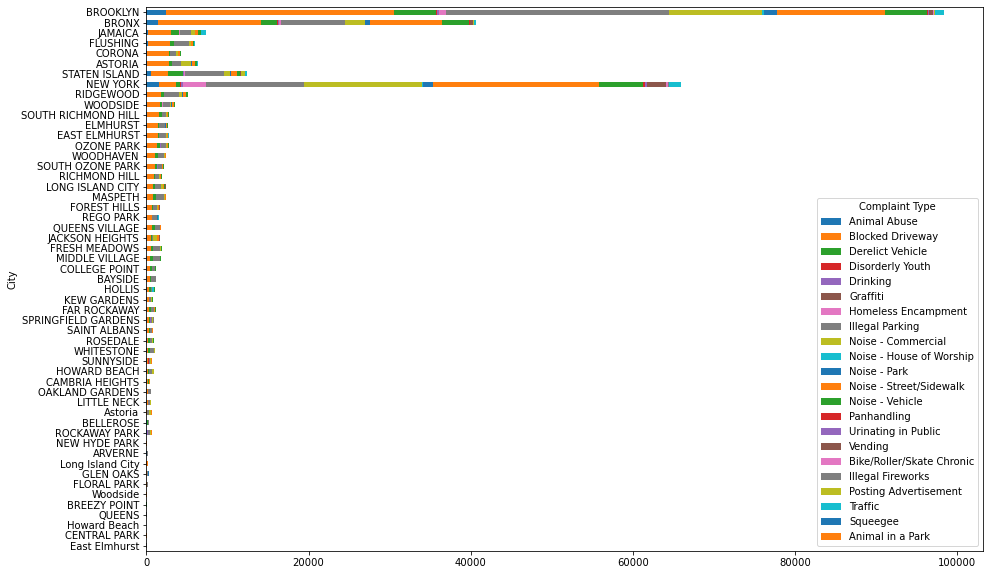

In [81]:
nyc1.sort_values('Blocked Driveway',axis=0,ascending=True).plot(kind="barh",stacked=True,figsize=(15,10))

### Brooklyn  has maximum complaint types.

In [91]:
nyc2=nyc.groupby(['Agency Name','Complaint Type']).size().unstack().head(50)
nyc2

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
Agency Name,,,,,,,,,,,,,,,,,,,,,
Internal Affairs Bureau,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NYPD,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
New York City Police Department,NaN,7768.0,1.0,424.0,76809.0,17588.0,286.0,1275.0,113.0,4416.0,...,929.0,4022.0,48076.0,17033.0,305.0,648.0,4.0,4496.0,592.0,3795.0


<AxesSubplot:xlabel='Agency Name'>

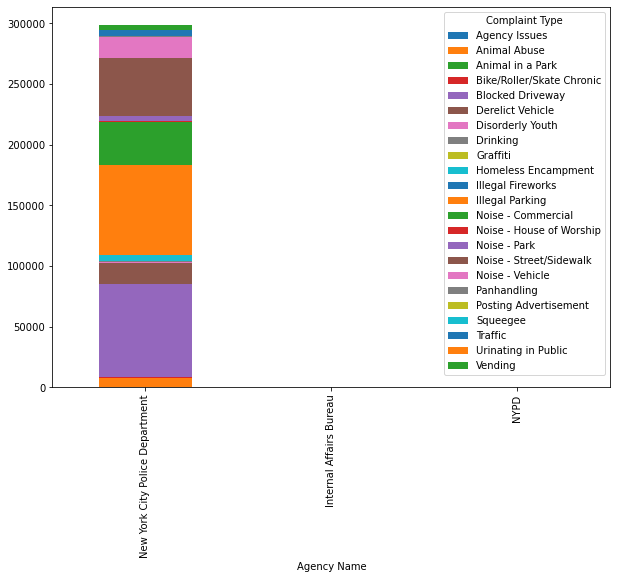

In [98]:
nyc2.sort_values('Animal Abuse',axis=0,ascending=True).plot(kind="bar",stacked=True,figsize=(10,7))

In [101]:
nyc['Request_Closing_Time']

0          3315.0
1          5176.0
2         17491.0
3         27914.0
4         12422.0
           ...   
300692     2309.0
300694     7231.0
300695    11237.0
300696    14733.0
300697    14929.0
Name: Request_Closing_Time, Length: 298534, dtype: float64

Text(0.5, 1.0, 'Average Request Closing Time for Boroughs')

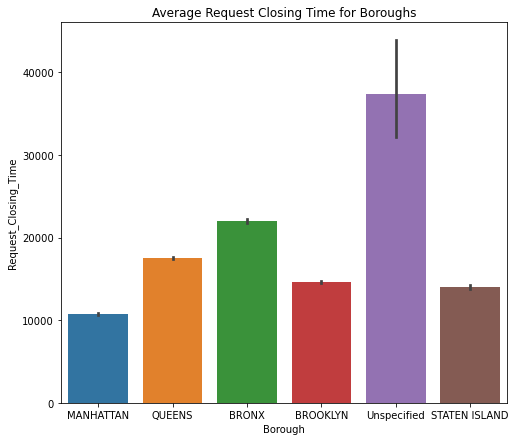

In [108]:
plt.figure(figsize=(8,7))
sns.barplot(x='Borough', y='Request_Closing_Time', data=nyc)
plt.title('Average Request Closing Time for Boroughs')

In [125]:
nyc3=nyc['Complaint Type'].value_counts()
nyc3.nlargest()

Blocked Driveway           76810
Illegal Parking            74532
Noise - Street/Sidewalk    48076
Noise - Commercial         35247
Derelict Vehicle           17588
Name: Complaint Type, dtype: int64

<AxesSubplot:>

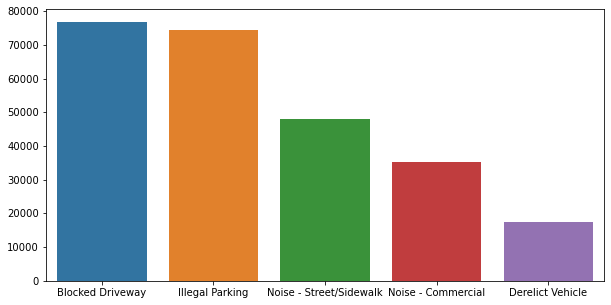

In [119]:
plt.figure(figsize=(10,5))
sns.barplot(x=nyc3.nlargest().index, y= nyc3.nlargest().values)

Order the complaint types based on the average ‘Request_Closing_Time’ for different location

In [134]:
nyc.groupby(['City','Complaint Type'])['Request_Closing_Time'].mean().unstack().fillna(0).head(3)

Complaint Type,Animal Abuse,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Parking,Noise - Commercial,Noise - House of Worship,...,Noise - Vehicle,Panhandling,Urinating in Public,Vending,Bike/Roller/Skate Chronic,Illegal Fireworks,Posting Advertisement,Traffic,Squeegee,Animal in a Park
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,7753.052632,9093.485714,10685.592593,12928.500000,859.000000,5520.00,6533.2500,8338.913793,8234.000000,5623.909091,...,6695.571429,3720.0,2491.000000,1740.0,0.000000,0.0,0.0,0.000000,0.0,0.0
ASTORIA,18000.608000,17338.024064,34881.299145,10449.333333,17000.714286,50742.25,17703.3125,17400.207865,11278.904872,7280.000000,...,12633.034314,4140.0,16652.555556,17767.5,6261.533333,9984.5,21132.0,19476.659574,0.0,0.0
Astoria,0.000000,17692.663793,22450.166667,0.000000,0.000000,0.00,0.0000,16960.643192,12750.804598,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


Normality check

In [135]:
from scipy.stats import shapiro

In [147]:
stats,p=shapiro(nyc['Request_Closing_Time'])
print(stats)
print(p)

0.5144980549812317
0.0


C:\Users\hp\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


As p-value is less than 0.05,we can reject null hypothesis and it shows that it's not normally distributed.

In [148]:
import statsmodels.api as sm
import pylab

<function matplotlib.pyplot.show(close=None, block=None)>

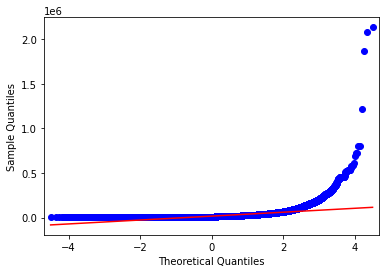

In [171]:
sm.qqplot(nyc['Request_Closing_Time'],line='s')
pylab.show

QQplot shows that the data is not normally distributed.

In [157]:
complaint_types=nyc['Complaint Type'].unique()
complaint_types

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Agency Issues', 'Squeegee', 'Animal in a Park'], dtype=object)

In [156]:
len(complaint_types)

23

In [178]:
dataset={}
for i in complaint_types:
    dataset[i]= np.log(nyc[nyc['Complaint Type']==i]['Request_Closing_Time'])

In [179]:
dataset.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling', 'Noise - Park', 'Homeless Encampment', 'Urinating in Public', 'Graffiti', 'Disorderly Youth', 'Illegal Fireworks', 'Agency Issues', 'Squeegee', 'Animal in a Park'])

ANOVA Analysis (Checking for top 5 complaints)

Null Hypothesis: The average response time across complaint types is not different

Alternate Hypothesis: The average response time across complaint types is different

In [180]:
from scipy.stats import f_oneway
stat,p = f_oneway(dataset['Noise - Street/Sidewalk'], dataset['Blocked Driveway'], dataset['Illegal Parking'], dataset['Derelict Vehicle'], 
                dataset['Noise - Commercial'])

alpha=0.05
if p>0.05:
    print('Null Hypothesis is accepted')
else:
    print('Null hypothesis is rejected')

Null hypothesis is rejected


In [181]:
nyc4=nyc[['Complaint Type','Location','Latitude','Longitude','City','Borough']]
nyc4.head(2)

,Complaint Type,Location,Latitude,Longitude,City,Borough
0,Noise - Street/Sidewalk,"(40.86568153633767, -73.92350095571744)",40.865682,-73.923501,NEW YORK,MANHATTAN
1,Blocked Driveway,"(40.775945312321085, -73.91509393898605)",40.775945,-73.915094,ASTORIA,QUEENS


In [182]:
nyc4['Complaint Type']=nyc4['Complaint Type'].astype('category').cat.codes
nyc4['City']= nyc4['City'].astype('category').cat.codes
nyc4['Borough']= nyc4['Borough'].astype('category').cat.codes

<ipython-input-182-450965263652>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc4['Complaint Type']=nyc4['Complaint Type'].astype('category').cat.codes
<ipython-input-182-450965263652>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc4['City']= nyc4['City'].astype('category').cat.codes
<ipython-input-182-450965263652>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [184]:
nyc4.dtypes

Complaint Type       int8
Location           object
Latitude          float64
Longitude         float64
City                 int8
Borough              int8
dtype: object

In [185]:
nyc4.head(2)

,Complaint Type,Location,Latitude,Longitude,City,Borough
0,15,"(40.86568153633767, -73.92350095571744)",40.865682,-73.923501,33,2
1,4,"(40.775945312321085, -73.91509393898605)",40.775945,-73.915094,1,3


In [187]:
nyc4.corr()

,Complaint Type,Latitude,Longitude,City,Borough
Complaint Type,1.000000,0.152829,-0.181022,0.094572,-0.065506
Latitude,0.152829,1.000000,0.364962,-0.000568,-0.249488
Longitude,-0.181022,0.364962,1.000000,-0.123858,0.021363
City,0.094572,-0.000568,-0.123858,1.000000,0.705705
Borough,-0.065506,-0.249488,0.021363,0.705705,1.000000


From the first line,it can be seen that the complaint types does not depend upon the location.

# THANK YOU